Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


4.796741539953582


/Users/somnathdutta/.local/share/virtualenvs/pv_diagram-oghaSsx6/lib/python3.9/site-packages/aplpy-2.1.dev44+g241f744-py3.9.egg/aplpy/core.py:782: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys"))
  cm.set_bad(color)


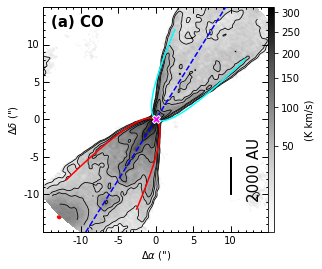

In [29]:
import aplpy
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u
import numpy as np
import glob
import matplotlib.patches as patches
from scipy.ndimage.filters import gaussian_filter

# Program written as "offset.py" in this folder
from offset import linear_offset_coords
from astropy.coordinates import SkyCoord, FK5
from sympy import plot_implicit, symbols, Eq, And, cos, sin
from  matplotlib.colors import LinearSegmentedColormap


def plot(obj,fig,width, height):
    inpvalue = obj
    field0= inpvalue[0]
    subl1 = inpvalue[1]
    subl2 = inpvalue[2]
    subldx3 = inpvalue[3]
    subldy4 = inpvalue[4]
    rms = inpvalue[5]
    rapix = inpvalue[6]
    decpix = inpvalue[7]
    exponent = inpvalue[8]
    inptext2 = inpvalue[9]
    hiwi = inpvalue[10]
    inptext1 = inpvalue[11]
    fileRobust = inpvalue[12]
    suname1 = field0+".cube.SPW0.CO.imageSELECTED.mom.integrated.fits"


#################
    fits_file=get_pkg_data_filename(suname1)
    hdu=fits.open(fits_file)[0]
    wcs=WCS(hdu.header)
    image_data=hdu.data
    #################
    BMAJ = hdu.header['BMAJ']*60*60
    BMIN = hdu.header['BMIN']*60*60
    freqency_CO = 230.538  #hdu.header['RESTFRQ']*1e-9 #GHz
    temp_factor = (1.222* (10**6))/(((freqency_CO)**2)*(BMAJ * BMIN))
    hdu.data = hdu.data*temp_factor
    imagetest=np.nan_to_num(hdu.data)#(hdu_K) # Since image is circular, "nan" will appear at the of-image part. replace them with "zero" with this numpy function.
    vmax1=np.max(imagetest)
    vmin1=np.min(imagetest)
    
    rms  = rms*temp_factor
    print(rms)
#################
    
    wx, wy = wcs.wcs_pix2world(rapix, decpix, 1)
    galcen = SkyCoord(wx * u.deg, wy * u.deg, frame=FK5)
    wcs_offset = linear_offset_coords(wcs, galcen)
    hdu_linear = hdu.copy()
    hdu_linear.header = wcs_offset.to_header()
################


    
    
    fig=fig
    f = aplpy.FITSFigure(hdu_linear,figure=fig,subplot=[subl1,subl2,subldx3,subldy4])

    cmap0 = LinearSegmentedColormap.from_list('', ['white', 'blue','skyblue','green','yellow','red'])
    f.show_colorscale(vmin=rms,vmax=vmax1,cmap='Greys',stretch='power',exponent=exponent)#pmin=0.25,pmax=100,cmap='jet')#stretch='power',exponent=0,cmap='jet')
    BPA = hdu.header['BPA']; BMAJ = hdu.header['BMAJ']*60*60; BMIN = hdu.header['BMIN']*60*60
    f.show_ellipses(-13 * u.arcsec, -13 * u.arcsec, BMAJ*u.arcsec, BMIN*u.arcsec, angle=90+BPA, layer=False, zorder=None, coords_frame='world',edgecolor='red', facecolor='red')

    f.ticks.set_tick_direction('in')
    f.axis_labels.set_xtext(r'$\Delta  \alpha $ (")')
    #f.axis_labels.set_xpad(2)
    f.axis_labels.set_xpad(1)
    
    f.axis_labels.set_ytext(r'$\Delta \delta$ (")')
    f.axis_labels.set_ypad(1)

 
    ################
    rmsCO = rms #3.36e-02
    clevels = np.array([3,5,9,12,18,24,36])*rmsCO
    sigma = 3.0 # this depends on how noisy your data is, play with it!
    data2 = gaussian_filter(hdu_linear.data, sigma)
    plt.contour(data2, levels=clevels, colors='black',linewidths=0.8)



    ######### Center at 0,0 #############
    f.recenter(0, 0, width=width, height=height)  # degrees
    ######### Color Bar #############
    f.add_colorbar()
    f.ticks.set_length(length=6, minor_factor=0.5)
    f.colorbar.set_width(0.08)  # arbitrary units, default is 0.2
    f.colorbar.set_pad(0.0)  # arbitrary units, default is 0.05
    f.colorbar.set_axis_label_text('(K km/s)')
    f.set_nan_color('white')
    ################ SCALE BAR ###########################
    f.show_arrows(10, -10, 0.0, 5, #83.1168184, -5.5734210, 0.0, 0.001, 
                width='auto', head_width=0.0, head_length=0.0, 
                color='black', length_includes_head=True, layer=False)
    f.add_label(0.94, 0.28, '2000 AU', relative=True, color='black', size=15, rotation='vertical')#, layer='title')




### Define Figure size
fig = plt.figure(figsize=(16, 16))
width=30.0; height=30.0



# 0:Source 1:pos_x  2:pos_y  3:pos_dx 4:pos_dy 5:rms 6:cen x-pix 7:cen y-pix 8:exponent, 
#9:inptext2,  10:hei-width,    11:inptext1 12:Robust_forImage
##;################################################# START CLASS 0 plot#1 ##########################################################################
obj2 = {0: 'G203.21-11.20W2', 1:0.40, 2:0.50, 3:0.20, 4:0.20, 5:3.36e-02, 6:495., 7:483., 8:1/2., 9: 'Class 0', 10:0.011, 11: '(c) ', 12:2}
field0= obj2[0]
plot(obj2,fig,width, height)
fig.canvas.draw()

####### Second Axes for over plotting the parabolla  ############
sub_axes = plt.axes([0.40,0.502,0.195,0.196]) # define zoom axes, (x_start, y_start, dx, dy)
sub_axes.patch.set_alpha(0.1) # Transparent background
sub_axes.axis('off') # turn off it to see over-plotting offset

##### North: 
h = 0.0; k = 0.0; P = 0.5; i =np.deg2rad(-35) # Inclination of integrated map (NOT the actual source inclination)
xx,yy = np.linspace(-12,12), np.linspace(-12,12)
x,y = np.meshgrid(xx,yy)
#h = 0; k = 0; P = 0.17; i =np.deg2rad(90)
sub_axes.contour(x, y, (-(x-h)*np.sin(i) + (y-k)*np.cos(i) - P*((x-h)*np.cos(i) + (y-k)*np.sin(i))**2), [0],
                 linewidths=1.5, colors='cyan');

#inc01=np.rad2deg(np.arctan(1/np.sqrt(P)))

#South: Blue
h = 0.0; k = 0.0; P = 0.5; i =np.deg2rad(145)
sub_axes.contour(x, y, (-(x-h)*np.sin(i) + (y-k)*np.cos(i) - P*((x-h)*np.cos(i) + (y-k)*np.sin(i))**2), [0],
                 linewidths=1.5,colors='red');
inc02=np.rad2deg(np.arctan(1/np.sqrt(P)))


sub_axes.set_xlim([-width/2.0,+width/2.0])
sub_axes.set_ylim([-height/2.0,+height/2.0])

#sub_axes.plot([0],[0],"+",color='white',lw=2.0, markersize=14)
sub_axes.plot([0.0],[0.0],"X",color='magenta',mec='white',mew=1.0, lw=0.250, markersize=8,zorder=10)
#sub_axes.vlines(0.0 ,-50, +50, colors='blue', linestyles='dashed')
sub_axes.axline((0.0, 0.0), slope=np.tan(np.deg2rad(58)), color="blue", linestyle='--')
#sub_axes.text(-14, 13, '(c) CO', 
sub_axes.text(-14, 13, '(a) CO',               
        va='center',fontsize=15,fontweight='bold',color='black', #fontstyle='italic',
        rotation='horizontal')




fig_name = field0+'outflow_parabola.pdf'
fig.savefig(fig_name, bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/somnathdutta/.local/share/virtualenvs/pv_diagram-oghaSsx6/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


0.11135292860606531


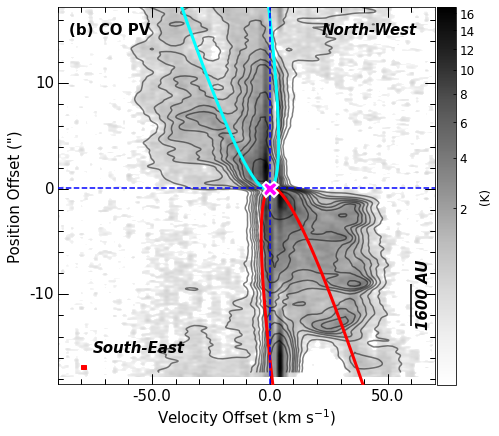

In [30]:
from __future__ import print_function, division
import matplotlib.colors as mcl
#import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.transforms import Affine2D
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
#from astropy.visualization.wcsaxes import WCSAxes
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator#, FormatStrFormatter
import matplotlib.colors 
from math import pi, cos, sin
from PIL import Image, ImageDraw 
import scipy.ndimage as ndimage
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
#########

cmap0 = LinearSegmentedColormap.from_list('', ['white', 'blue','skyblue','green','yellow','red'])



'''READ DATA; WCS;  ImageData-Transpose to convert velocity as x-axis'''
fits_file = get_pkg_data_filename('G203.21-11.20W2.CO.pv.fits') 
#####fits_file = get_pkg_data_filename('G191.90-11.21S.CO.pv.fits') 
# I made, CRVAL2  =  -9.999999999996E+04 >>  -10.999999999996E+04 (subtracetd 10 km/s)
hdu = fits.open(fits_file)[0]
original_CRVAL = hdu.header['CRVAL2'] #Original value
vsys = 10 #km/s
hdu.header['CRVAL2'] = original_CRVAL - vsys*10**3
wcs = WCS(hdu.header)
###
BMAJ = hdu.header['BMAJ']*60*60
BMIN = hdu.header['BMIN']*60*60
freqency_CO = hdu.header['RESTFRQ']*1e-9 #GHz
temp_factor = (1.222* (10**6))/(((freqency_CO)**2)*(BMAJ * BMIN))
###
image_data = hdu.data*temp_factor
image_data = image_data.T # Just to change Y-axes to X-axis
image_data_smooth = ndimage.gaussian_filter(image_data, sigma=2.0, order=0)

imagetest = np.nan_to_num(image_data)
vdmax = np.max(imagetest); vdmin = np.min(imagetest)
norm = matplotlib.colors.Normalize(vdmin,vdmax)


'''Define Axes'''
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wcs, slices=('y','x'))#, figure=fig)#, figsize=(6,6)) 

''' slices=('y','x') flip the X and Y : 
    PV to VP diagram; then use .transpose() in imshow(image_data.imshow())'''

'''Show Data with imshow'''
rms = 0.00078*temp_factor; print(rms)
image = ax.imshow(image_data, vmin=rms, norm=mcl.PowerNorm(gamma=0.35), cmap='Greys', origin='lower', zorder=1)#, extent=[0, 10, 0, 5]


'''Add color bar'''
cbar = plt.colorbar(image, shrink=0.87,pad=0.005)
# Shrink = fractional length UP-Down; pad = space between figure and colorbar
cbar.set_label('(K)', size=12)#, fontsize=15)
cbar.ax.tick_params(labelsize=12, direction='in')

''' Add levels'''
#% of maximum
l80 = np.max(image_data)*80.0/100.0
l50 = np.max(image_data)*50.0/100.0
l20 = np.max(image_data)*30.0/100.0

'''Add contours'''
#select box, the canculate rms  rms 
#box=image_data[185:210,70:90]
#rms = np.std(box)
rms = rms; clevels = np.array([3,6,9,12,15,18,24,30,50])*rms
ax.contour(image_data_smooth, levels=clevels, 
           colors='black', alpha=0.5, zorder=2)


''' [1] takes as X-axis, even after transpose and flip'''
ax.coords[1].set_major_formatter('x.x') # Do it, otherwise results will show round values, NOT float
ax.coords[1].set_format_unit(u.km / u.s)



''' Define Axes limit in terms of pixel; here x-velocity and Y-position'''
vel_pix = [10.0,90.0]; pos_pix = [24,620]
position_axis_min, vel_axis_min = wcs.pixel_to_world(pos_pix[0], vel_pix[0])                                                    
position_axis_max, vel_axis_max = wcs.pixel_to_world(pos_pix[1], vel_pix[1])
ax.set_xlim((vel_pix[0],vel_pix[1])) # in pixel
ax.set_ylim((pos_pix[0],pos_pix[1])) #in pixel
ax.set_aspect(abs(vel_pix[0]-vel_pix[1])/abs(pos_pix[0]-pos_pix[1]))
#ax.set_ylim((24,660.0)) #in pixel
#ax.set_xlim((0.0,99.0)) # in pixel


'''
Therefore rather than referring to x and y ticks as Matplotlib does, 
we use specialized objects to access the coordinates. The coordinates 
used in the plot can be accessed using the coords attribute. 
The coordinates can either be accessed by index:
lon = ax.coords[0]
lat = ax.coords[1]
'''
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.tick_params(axis='both', which='major', labelsize=15, direction='in', 
                length=10, width=1,colors='black', grid_color='black', grid_alpha=0.5)
ax.tick_params(which='minor', length=5)

'''Set plot axis lebel'''
plt.ylabel('Position Offset (")', fontsize=15)#,fontweight='bold')
plt.xlabel('Velocity Offset (km s$^{-1}$)', fontsize=15)#,fontweight='bold')#plt.savefig('bolT_oa1.png', format = 'png')


'''Add  Sub-axis'''
sub_axes = plt.axes([0.125,0.174,0.655,0.657]) # define zoom axes, (x_start, y_start, dx, dy)
#sub_axes = plt.axes([0.1, 0.1, 0.8, 0.8])
sub_axes.patch.set_alpha(0.1) # Transparent background
sub_axes.axis('off') # check by commenting it that bothe axis are same, otherwise (0,0) position may shift
vsys = vsys # Define systemic velocity; otherwise plot center is at (0,0)


    
####### North
'''
Equation of rotated parabola: (-x*np.sin(i) + y*np.cos(i) - P*(x*np.cos(i) + y*np.sin(i) - h)**2 - k) = 0
https://www.desmos.com/calculator/hguanwbkbu (plotting website)
Compare this to Chin-Fei equation 5.98: (-vobs*t0*np.sin(i) + z*np.cos(i) - P*(vobs*t0*np.cos(i) + z*np.sin(i))**2) = 0
Now, in Chin-Fei's equation include vortex (h,k) and coparing x = vobs*t0; y = z
'''
#'''
h = +0.0; k = 0; P = 0.5; i =np.deg2rad(20); t0=0.35
vv,zz = np.arange(-150.0,150.0,0.1), np.arange(-150.0,+150.0,0.1)
x,y = np.meshgrid(vv,zz)
sub_axes.contour(x, y, (-(x-h)*t0*np.sin(i) + (y-k)*np.cos(i) - P*((x-h)*t0*np.cos(i) + (y-k)*np.sin(i))**2), [0],
                 linewidths=3.0, linestyles='solid', colors='cyan');
#'''
##### South #########
h = +0.0; k = +0.0; P = 0.5; i =np.deg2rad(200); t0=0.35
vv,zz = np.arange(-150.0,150.0,0.1), np.arange(-150.0,+150.0,0.1)
x,y = np.meshgrid(vv,zz)
sub_axes.contour(x, y, (-(x-h)*t0*np.sin(i) + (y-k)*np.cos(i) - P*((x-h)*t0*np.cos(i) + (y-k)*np.sin(i))**2), [0],
                 linewidths=3.0, linestyles='solid', colors='red');


#CO average beam
rect=patches.Rectangle((-80,-17), 2.0, 0.35, linewidth=1.0, edgecolor='red',facecolor='red') 
sub_axes.add_patch(rect)


sub_axes.text(22, 15, 'North-West', 
        va='center',fontsize=15,fontweight='bold',fontstyle='italic',color='black', 
        rotation='horizontal')
sub_axes.text(-75, -15, 'South-East', 
        va='center',fontsize=15,fontweight='bold',fontstyle='italic',color='black', 
        rotation='horizontal')
sub_axes.plot([0],[0], 'X', color='magenta',mec='white', mew=2, ms=15)
sub_axes.hlines(0.10 ,-100, +100, colors='blue', linestyles='dashed')
sub_axes.vlines(0.0 ,-50, +50, colors='blue', linestyles='dashed')

sub_axes.vlines(60.0 ,-13.0, -9.0, colors='black')#, linestyles='dashed')
sub_axes.text(62, -10, '1600 AU', 
        va='center',fontsize=15,fontweight='bold',fontstyle='italic',color='black', 
        rotation='vertical')
#sub_axes.text(-85, 15, '(d) CO PV', 
sub_axes.text(-85, 15, '(b) CO PV',               
        va='center',fontsize=15,fontweight='bold',color='black', #fontstyle='italic',
        rotation='horizontal')


#sub_axes.set_xlim([-70,+48])
#sub_axes.set_ylim([-19.14,+19.26])
sub_axes.set_xlim([vel_axis_min.value*10**-3,vel_axis_max.value*10**-3])
sub_axes.set_ylim([position_axis_min.value,position_axis_max.value])
####################

#ax.set_rasterization_zorder(10) # Without this zorder = 10, creating bug of a number of lines
plt.savefig('G203.21-11.20W2pv_diagram_COparabola.pdf', bbox_inches='tight', dpi=75)#, facecolor='w', edgecolor='w', format='eps', bbox_inches='tight')#, dpi=1000)